# 1 - Logistic Regression


In [275]:
import pandas as pd

# Read Data
x=pd.read_csv('logistic_x.txt',sep = '  ',header = 0,engine='python')
x.head()
y=pd.read_csv('logistic_y.txt',sep = '  ',header = 0,engine='python')
y.head()

df = x.assign(cat=y)



In [276]:
df.iloc[:2,:] # Select first two rows


,A,B,cat
0,1.343250,-1.331148,-1.0
1,1.820553,-0.634668,-1.0


# 

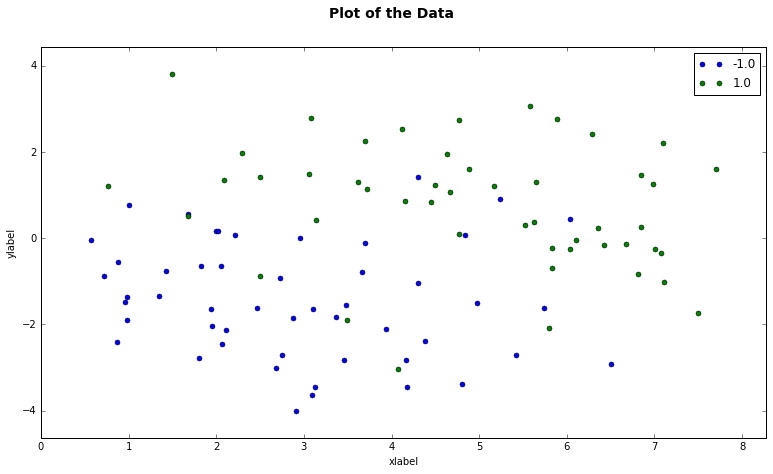

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt

groups = df.groupby('cat')

# Plot
fig, ax = plt.subplots(figsize=(13,7))
ax.margins(0.08) # Optional, just adds 8% padding to the autoscaling
for name, group in groups:
    ax.plot(group.A, group.B, marker='o', linestyle='', ms=5, label=name)
ax.legend()

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
fig.suptitle('Plot of the Data', fontsize=14, fontweight='bold')
plt.show(fig)

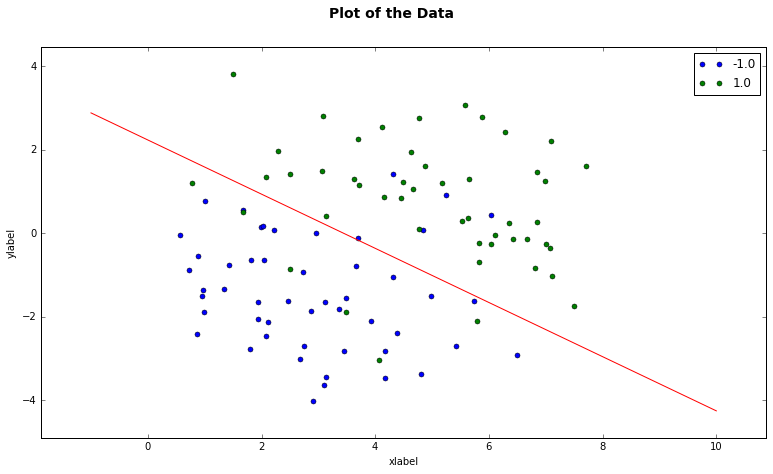

In [280]:
# Log Regression function 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


def log_regression (X,Y, max_iters):
    #X and Y numpy elements
    # rows of X are training samples
    # rows of Y are corresponding -1/1 values
    # newton raphson: theta = theta - inv(H)* grad;
    # with H = hessian, grad = gradient
    size = X.shape
    mm = size[0]+1
    nn = size[1]+1
    
    X = np.insert(X, 0, 1, axis=1)
    theta = np.zeros((nn,1))
    ll = np.zeros((max_iters, 1))
    
    mat = np.zeros((size[0],size[0]))
    
    # Using Newton-Raphson Algo
    
    for i in range(1,max_iters):
        margins = np.multiply(Y,(np.dot(X, theta)))
        ll[i] = (1./mm) * sum(np.log(1 + np.exp(-margins)))
        probs = 1 / (1 + np.exp(margins))
        grad = -(1./mm) * np.dot(X.T,(np.multiply(probs,Y)))
        np.fill_diagonal(mat,np.multiply(probs, (1 - probs)))
        H = (1./mm) * X.T * mat *X
        #print(H)
        theta = theta - np.linalg.solve(H, grad)

    
    return theta, ll 

######################## Train the algo on Data (x,y)

x = np.matrix([df.A, df.B]).T
y = np.matrix([df.cat]).T

Results = log_regression (x,y, 20)
theta = Results[0]


def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()
    
a = float(theta[0] / theta[2])
b = float(theta[1] / theta[2])

formula = '-'+str(a)+'-'+str(b)+'*x'

groups = df.groupby('cat')

# Plot
fig, ax = plt.subplots(figsize=(13,7))
ax.margins(0.08) # Optional, just adds 8% padding to the autoscaling
for name, group in groups:
    ax.plot(group.A, group.B, marker='o', linestyle='', ms=5, label=name)
ax.legend()

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
fig.suptitle('Plot of the Data', fontsize=14, fontweight='bold')
graph(formula, range(-1, 11))  #This one comes after regression 
plt.show(fig)


In [244]:
#Regression for denoising quasar spectra

import pandas as pd
import numpy as np
# Read Data

train =pd.read_csv('quasar_train.csv',header = 0)
train.head()

lambdas = np.matrix(list(train.columns.values))
data = np.matrix(train[:])

L = np.asarray(lambdas).reshape(-1)


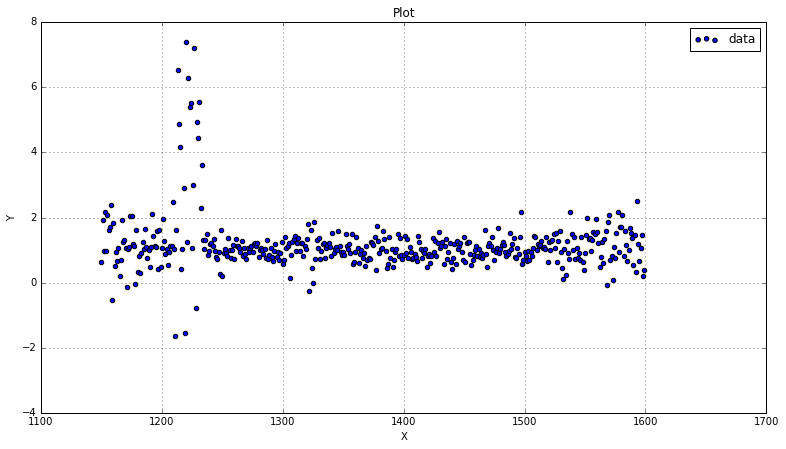

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(13,7))
plt.scatter(lambdas,data[0],label = "data")


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot')
plt.legend(loc="upper right")
plt.grid(True)
plt.show(fig)




In [250]:
#Local Linear Regression (ordinary)


def local_linear_regression(x,Y,tau):
    size = x.shape
    nn = size[0]
    
    X = np.insert(x, 0, 1, axis=1)

    yhat = np.zeros((nn,1))

    for i in range(0,nn-1):
        w = np.exp(-np.power((x - x[i]),2)/(2*tau*tau))
        W = np.concatenate((w,w),axis=1)
        XwX = np.dot(X.T,np.multiply(W,X))
        XtWy = np.dot(X.T,np.multiply(w,Y))
        theta = np.linalg.solve(XwX, XtWy)
        yhat[i] = [1,x[i]]*theta
        
    return yhat


    
X = np.matrix((str(train.columns.values))).T
Y = data[0].T
tau = 5
yhat = local_linear_regression(X,Y,tau)  


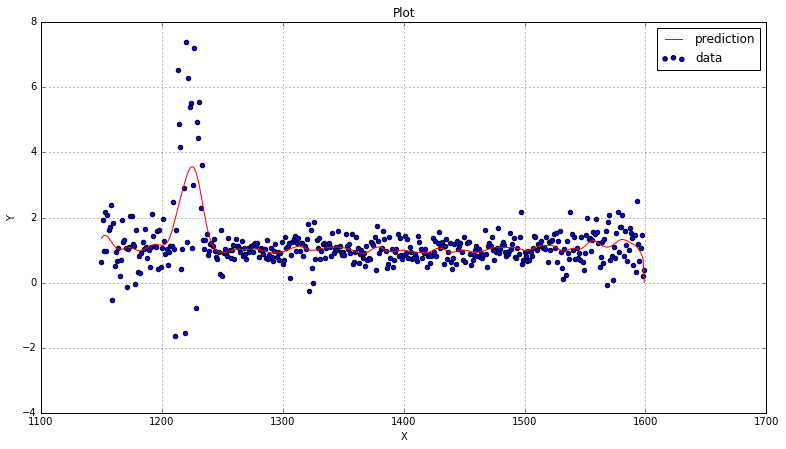

In [266]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(13,7))
plt.scatter(lambdas,data[0],label = "data")
plt.plot(L,yhat,linestyle = '-',label = "prediction",color = 'red',linewidth = 1)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()